In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pyCloudy as pc
import pyneb as pn
from astropy import units as u
import os


Luminosity 만 우선 variable 하게 설정.

In [3]:
emis=['H  1  1215.67A',
'H  1  1025.72A',
'H  1  4861.33A',
'H  1  6562.81A',
'O  6  1031.91A',
'O  6  1037.62A',
'He 2  949.31A',
'He 2  972.108A',
'He 2  1025.27A',
'He 2  1640.43A',
'He 2  4859A',
'He 2  4339A',
'He 2  6529A',
'He 2  6560A',
'C  4  1550.78',
'O  3  5006.84A',
'N  5  1238.82',
'N  5  1242.80',
'c  4  1548.19',
'c  4  1550.78',
'mg 2  2795.53',
'mg 2  2802.71'
]


#'Case B'
options= [
          'stop column denstiy 24',
          'stop temperature off']

특이사항 :
luminosity = Lum[21] 에서는 오류가 발생.

Luminosity Test

In [4]:

N = 100
rr = np.linspace(1, N, N)
Lumin = np.linspace(35,38,N)
Temp = np.linspace(1.00E+4,3.00E+5,N)
Hd = np.linspace(2,7,N)

Lum_Lya = np.zeros(N)
Lum_Lyb = np.zeros(N)
Lum_Ha = np.zeros(N)
Lum_Hb = np.zeros(N)
Lum_O6 = np.zeros(N)
Lum_O6_1 = np.zeros(N)
Lum_O6_2 = np.zeros(N)

Lum_O3 = np.zeros(N)

Lum_C4 = np.zeros(N)
Lum_C4_1 = np.zeros(N)
Lum_C4_2 = np.zeros(N)
Lum_N5 = np.zeros(N)
Lum_N5_1 = np.zeros(N)
Lum_N5_2 = np.zeros(N)


Lum_Mg2 = np.zeros(N)
Lum_Mg2_1 = np.zeros(N)
Lum_Mg2_2 =  np.zeros(N)

Lum_He2_949 = np.zeros(N)
Lum_He2_972 = np.zeros(N)
Lum_He2_1025 = np.zeros(N)
Lum_He2_1640 = np.zeros(N)

Lum_He2_4339 = np.zeros(N)
Lum_He2_4859 = np.zeros(N)
Lum_He2_6529 = np.zeros(N)
Lum_He2_6560 = np.zeros(N)

Nden_HI = np.zeros(N)
Nden_HII = np.zeros(N)
Nden_OVI = np.zeros(N)
Nden_NV = np.zeros(N)
Nden_CIV = np.zeros(N)
# rr = np.arange(23,101,1)
ex = []
for ii,nn in enumerate(rr):
    Mod = pc.CloudyModel(r"/home/jin/cloudy_Test/pne/lum_v/data_%d/data_%d"%(nn,nn))
    try:
        Lum_Lya[ii] = float(Mod.get_emis_vol('H__1_121567A'))
        Lum_Lyb[ii] = float(Mod.get_emis_vol('H__1_102572A'))
        Lum_Ha[ii] = float(Mod.get_emis_vol('H__1_656281A'))
        Lum_Hb[ii] = float(Mod.get_emis_vol('H__1_486133A'))

        Lum_O6[ii] = float(Mod.get_emis_vol('O__6_103191A')) + float(Mod.get_emis_vol('O__6_103762A'))
        Lum_O6_1[ii] = float(Mod.get_emis_vol('O__6_103191A'))
        Lum_O6_2[ii] = float(Mod.get_emis_vol('O__6_103762A'))
        
        Lum_O3[ii] = float(Mod.get_emis_vol('O__3_500684A'))

        Lum_C4[ii] = float(Mod.get_emis_vol('C__4_154819A')) + float(Mod.get_emis_vol('C__4_155078A'))
        Lum_C4_1[ii] = float(Mod.get_emis_vol('C__4_154819A'))
        Lum_C4_2[ii] = float(Mod.get_emis_vol('C__4_155078A'))

        Lum_N5[ii] = float(Mod.get_emis_vol('N__5_123882A')) + float(Mod.get_emis_vol('N__5_124280A'))
        Lum_N5_1[ii] = float(Mod.get_emis_vol('N__5_123882A'))
        Lum_N5_2[ii] = float(Mod.get_emis_vol('N__5_124280A'))


        Lum_Mg2[ii] = float(Mod.get_emis_vol('MG_2_279553A'))+ float(Mod.get_emis_vol('MG_2_280271A'))
        Lum_Mg2_1[ii] = float(Mod.get_emis_vol('MG_2_279553A'))
        Lum_Mg2_2[ii] =  float(Mod.get_emis_vol('MG_2_280271A'))

        Lum_He2_949[ii] = float(Mod.get_emis_vol('HE_2_949310A'))
        Lum_He2_972[ii] = float(Mod.get_emis_vol('HE_2_972108A'))
        Lum_He2_1025[ii] = float(Mod.get_emis_vol('HE_2_102527A'))  
        Lum_He2_1640[ii] = float(Mod.get_emis_vol('HE_2_164043A'))

        Lum_He2_4339[ii] = float(Mod.get_emis_vol('HE_2_433900A'))
        Lum_He2_4859[ii] = float(Mod.get_emis_vol('HE_2_485900A'))
        Lum_He2_6529[ii] = float(Mod.get_emis_vol('HE_2_652900A'))
        Lum_He2_6560[ii] = float(Mod.get_emis_vol('HE_2_656000A'))
                             
        N_H = sum(Mod.dr*Mod.nH)
        frac_C = 2.45E-04
        frac_O = 4.90E-04
        frac_N = 8.51E-05
        frac_Mg = 3.47E-05
        N_HI = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',0))
        N_HII = sum(Mod.dr*Mod.nH*Mod.get_ionic('H',1))
        N_OVI = frac_O*sum(Mod.dr*Mod.nH*Mod.get_ionic('O',5))
        N_NV = frac_N*sum(Mod.dr*Mod.nH*Mod.get_ionic('N',4))
        N_CIV = frac_C*sum(Mod.dr*Mod.nH*Mod.get_ionic('C',3))
        Nden_HI[ii] = N_HI
        Nden_HII[ii] = N_HII 
        Nden_OVI[ii] = N_OVI
        Nden_NV[ii] = N_NV
        Nden_CIV[ii] = N_CIV
    except AttributeError:
        ex.append(int(nn-1))
        print('error  = %d'%(nn))



warng CloudyModel /home/jin/cloudy_Test/pne/lum_v/data_22/data_22: Model aborted
error  = 22


In [5]:
Lumin = np.delete(Lumin,ex)
Temp = np.delete(Temp,ex)
Hd = np.delete(Hd,ex)
Lum_Lya = np.delete(Lum_Lya,ex)
Lum_Lyb = np.delete(Lum_Lyb,ex)
Lum_Ha = np.delete(Lum_Ha,ex)
Lum_Hb = np.delete(Lum_Hb,ex)


Lum_O6 = np.delete(Lum_O6,ex)
Lum_O6_1 = np.delete(Lum_O6_1,ex)
Lum_O6_2 = np.delete(Lum_O6_2,ex)

Lum_O3 = np.delete(Lum_O3,ex)

Lum_C4 = np.delete(Lum_C4,ex)
Lum_C4_1 = np.delete(Lum_C4_1,ex)
Lum_C4_2 = np.delete(Lum_C4_2,ex)

Lum_N5 = np.delete(Lum_N5,ex)
Lum_N5_1 = np.delete(Lum_N5_1,ex)
Lum_N5_2 = np.delete(Lum_N5_2,ex)


Lum_Mg2 = np.delete(Lum_Mg2,ex)
Lum_Mg2_1 = np.delete(Lum_Mg2_1,ex)
Lum_Mg2_2 =  np.delete(Lum_Mg2_2,ex)

Lum_He2_949 = np.delete(Lum_He2_949,ex) 
Lum_He2_972 = np.delete(Lum_He2_972,ex)
Lum_He2_1025 = np.delete(Lum_He2_1025,ex)
Lum_He2_1640 = np.delete(Lum_He2_1640,ex)

Lum_He2_4339 = np.delete(Lum_He2_4339,ex)
Lum_He2_4859 = np.delete(Lum_He2_4859,ex)
Lum_He2_6529 = np.delete(Lum_He2_6529,ex)
Lum_He2_6560 = np.delete(Lum_He2_6560,ex)

Nden_HI = np.delete(Nden_HI,ex)
Nden_HII = np.delete(Nden_HII,ex)
Nden_OVI = np.delete(Nden_OVI,ex)
Nden_NV = np.delete(Nden_NV,ex)
Nden_CIV = np.delete(Nden_CIV,ex)

Case B

In [6]:

# N = 100
# rr = np.linspace(1, N, N)
Lumin_B = np.linspace(35,38,N)
Temp_B = np.linspace(1.00E+4,3.00E+5,N)
Hd_B = np.linspace(2,7,N)

Lum_Lya_B = np.zeros(N)
Lum_Lyb_B = np.zeros(N)
Lum_Ha_B = np.zeros(N)
Lum_Hb_B = np.zeros(N)
Lum_O6_B = np.zeros(N)
Lum_O6_1_B = np.zeros(N)
Lum_O6_2_B = np.zeros(N)

Lum_O3_B = np.zeros(N)

Lum_C4_B = np.zeros(N)
Lum_C4_1_B = np.zeros(N)
Lum_C4_2_B = np.zeros(N)
Lum_N5_B = np.zeros(N)
Lum_N5_1_B = np.zeros(N)
Lum_N5_2_B = np.zeros(N)


Lum_Mg2_B = np.zeros(N)
Lum_Mg2_1_B = np.zeros(N)
Lum_Mg2_2_B =  np.zeros(N)

Lum_He2_949_B = np.zeros(N)
Lum_He2_972_B = np.zeros(N)
Lum_He2_1025_B= np.zeros(N)
Lum_He2_1640_B = np.zeros(N)

Lum_He2_4339_B = np.zeros(N)
Lum_He2_4859_B = np.zeros(N)
Lum_He2_6529_B = np.zeros(N)
Lum_He2_6560_B = np.zeros(N)

Nden_HI_B = np.zeros(N)
Nden_HII_B = np.zeros(N)
Nden_OVI_B = np.zeros(N)
Nden_NV_B = np.zeros(N)
Nden_CIV_B = np.zeros(N)
# rr = np.arange(23,101,1)
ex_B = []
for ii,nn in enumerate(rr):
    Mod_B = pc.CloudyModel(r"/home/jin/cloudy_Test/pne/lum_v_caseB/data_%d/data_%d"%(nn,nn))
    try:
        Lum_Lya_B[ii] = float(Mod_B.get_emis_vol('H__1_121567A'))
        Lum_Lyb_B[ii] = float(Mod_B.get_emis_vol('H__1_102572A'))
        Lum_Ha_B[ii] = float(Mod_B.get_emis_vol('H__1_656281A'))
        Lum_Hb_B[ii] = float(Mod_B.get_emis_vol('H__1_486133A'))

        Lum_O6_B[ii] = float(Mod_B.get_emis_vol('O__6_103191A')) + float(Mod_B.get_emis_vol('O__6_103762A'))
        Lum_O6_1_B[ii] = float(Mod_B.get_emis_vol('O__6_103191A'))
        Lum_O6_2_B[ii] = float(Mod_B.get_emis_vol('O__6_103762A'))
        
        Lum_O3_B[ii] = float(Mod_B.get_emis_vol('O__3_500684A'))

        Lum_C4_B[ii] = float(Mod_B.get_emis_vol('C__4_154819A')) + float(Mod_B.get_emis_vol('C__4_155078A'))
        Lum_C4_1_B[ii] = float(Mod_B.get_emis_vol('C__4_154819A'))
        Lum_C4_2_B[ii] = float(Mod_B.get_emis_vol('C__4_155078A'))

        Lum_N5_B[ii] = float(Mod_B.get_emis_vol('N__5_123882A')) + float(Mod_B.get_emis_vol('N__5_124280A'))
        Lum_N5_1_B[ii] = float(Mod_B.get_emis_vol('N__5_123882A'))
        Lum_N5_2_B[ii] = float(Mod_B.get_emis_vol('N__5_124280A'))


        Lum_Mg2_B[ii] = float(Mod_B.get_emis_vol('MG_2_279553A'))+ float(Mod_B.get_emis_vol('MG_2_280271A'))
        Lum_Mg2_1_B[ii] = float(Mod_B.get_emis_vol('MG_2_279553A'))
        Lum_Mg2_2_B[ii] =  float(Mod_B.get_emis_vol('MG_2_280271A'))

        Lum_He2_949_B[ii] = float(Mod_B.get_emis_vol('HE_2_949310A'))
        Lum_He2_972_B[ii] = float(Mod_B.get_emis_vol('HE_2_972108A'))
        Lum_He2_1025_B[ii] = float(Mod_B.get_emis_vol('HE_2_102527A'))  
        Lum_He2_1640_B[ii] = float(Mod_B.get_emis_vol('HE_2_164043A'))

        Lum_He2_4339_B[ii] = float(Mod_B.get_emis_vol('HE_2_433900A'))
        Lum_He2_4859_B[ii] = float(Mod_B.get_emis_vol('HE_2_485900A'))
        Lum_He2_6529_B[ii] = float(Mod_B.get_emis_vol('HE_2_652900A'))
        Lum_He2_6560_B[ii] = float(Mod_B.get_emis_vol('HE_2_656000A'))
                             
        N_H = sum(Mod_B.dr*Mod_B.nH)
        frac_C = 2.45E-04
        frac_O = 4.90E-04
        frac_N = 8.51E-05
        frac_Mg = 3.47E-05
        N_HI_B = sum(Mod_B.dr*Mod_B.nH*Mod_B.get_ionic('H',0))
        N_HII_B = sum(Mod_B.dr*Mod_B.nH*Mod_B.get_ionic('H',1))
        N_OVI_B = frac_O*sum(Mod_B.dr*Mod_B.nH*Mod_B.get_ionic('O',5))
        N_NV_B = frac_N*sum(Mod_B.dr*Mod_B.nH*Mod_B.get_ionic('N',4))
        N_CIV_B= frac_C*sum(Mod_B.dr*Mod_B.nH*Mod_B.get_ionic('C',3))
        Nden_HI_B[ii] = N_HI_B
        Nden_HII_B[ii] = N_HII_B
        Nden_OVI_B[ii] = N_OVI_B
        Nden_NV_B[ii] = N_NV_B
        Nden_CIV_B[ii] = N_CIV_B
    except AttributeError:
        ex_B.append(int(nn-1))
        print('error  = %d'%(nn))



warng CloudyModel /home/jin/cloudy_Test/pne/lum_v_caseB/data_28/data_28: Model aborted
error  = 28
warng CloudyModel /home/jin/cloudy_Test/pne/lum_v_caseB/data_29/data_29: Model aborted
error  = 29


In [7]:

Lumin_B = np.delete(Lumin_B,ex_B)
Temp_B = np.delete(Temp_B,ex_B)
Hd_B = np.delete(Hd_B,ex_B)
Lum_Lya_B = np.delete(Lum_Lya_B,ex_B)
Lum_Lyb_B = np.delete(Lum_Lyb_B,ex_B)
Lum_Ha_B = np.delete(Lum_Ha_B,ex_B)
Lum_Hb_B = np.delete(Lum_Hb_B,ex_B)


Lum_O6_B = np.delete(Lum_O6_B,ex_B)
Lum_O6_1_B = np.delete(Lum_O6_1_B,ex_B)
Lum_O6_2_B = np.delete(Lum_O6_2_B,ex_B)

Lum_O3_B = np.delete(Lum_O3_B,ex_B)

Lum_C4_B = np.delete(Lum_C4_B,ex_B)
Lum_C4_1_B = np.delete(Lum_C4_1_B,ex_B)
Lum_C4_2_B = np.delete(Lum_C4_2_B,ex_B)

Lum_N5_B = np.delete(Lum_N5_B,ex_B)
Lum_N5_1_B= np.delete(Lum_N5_1_B,ex_B)
Lum_N5_2_B = np.delete(Lum_N5_2_B,ex_B)


Lum_Mg2_B = np.delete(Lum_Mg2_B,ex_B)
Lum_Mg2_1_B = np.delete(Lum_Mg2_1_B,ex_B)
Lum_Mg2_2_B=  np.delete(Lum_Mg2_2_B,ex_B)

Lum_He2_949_B = np.delete(Lum_He2_949_B,ex_B) 
Lum_He2_972_B = np.delete(Lum_He2_972_B,ex_B)
Lum_He2_1025_B = np.delete(Lum_He2_1025_B,ex_B)
Lum_He2_1640_B = np.delete(Lum_He2_1640_B,ex_B)

Lum_He2_4339_B = np.delete(Lum_He2_4339_B,ex_B)
Lum_He2_4859_B = np.delete(Lum_He2_4859_B,ex_B)
Lum_He2_6529_B = np.delete(Lum_He2_6529_B,ex_B)
Lum_He2_6560_B = np.delete(Lum_He2_6560_B,ex_B)

Nden_HI_B = np.delete(Nden_HI_B,ex_B)
Nden_HII_B = np.delete(Nden_HII_B,ex_B)
Nden_OVI_B = np.delete(Nden_OVI_B,ex_B)
Nden_NV_B = np.delete(Nden_NV_B,ex_B)
Nden_CIV_B = np.delete(Nden_CIV_B,ex_B)

Text(0, 0.5, 'Lumninosity')

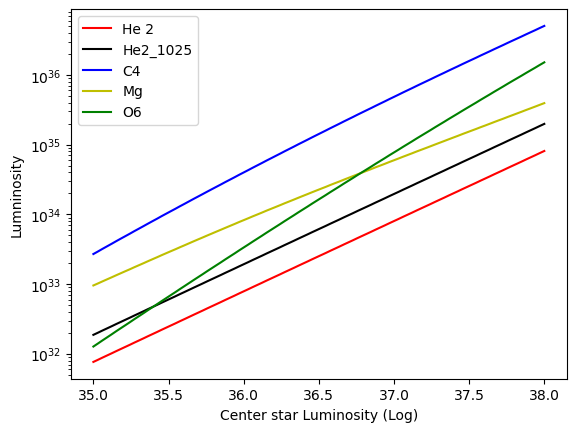

In [8]:
plt.plot(Lumin,Lum_He2_972,'r',markersize=1,label='He 2')
plt.plot(Lumin,Lum_He2_1025,'k',markersize=1,label='He2_1025')
plt.plot(Lumin,Lum_C4,'b',markersize=1,label='C4')
plt.plot(Lumin,Lum_Mg2,'y',markersize=1,label='Mg')
plt.plot(Lumin,Lum_O6,'g',markersize=1,label='O6')
plt.legend()
plt.yscale('log')
plt.xlabel('Center star Luminosity (Log)')
plt.ylabel('Lumninosity')
# plt.savefig('Center star luminosity verus Luminosity')

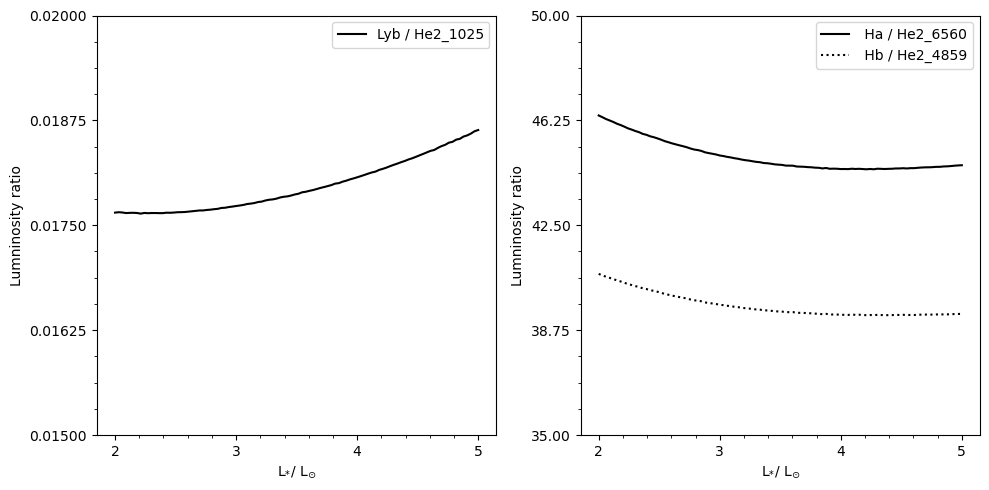

In [9]:
fig = plt.figure(1,figsize=(10,5))

plt.subplot(121)
plt.plot(Lumin-33,Lum_Lyb / Lum_He2_1025,'k',markersize=1,label='Lyb / He2_1025')
# plt.plot(Lumin_B/10**33,Lum_Lyb_B / Lum_He2_1025_B,'k--',markersize=1,label='Lyb / He2_1025 , case B')
plt.legend()
# plt.yscale('log')
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')
plt.yticks(np.linspace(0.015,0.02,5))
plt.xticks(np.linspace(2.0,5.0,4))
plt.minorticks_on()

plt.subplot(122)
plt.plot(Lumin-33,Lum_Ha / Lum_He2_6560 ,'k',markersize=1,label=' Ha / He2_6560')
plt.plot(Lumin-33,Lum_Hb / Lum_He2_4859 ,'k:',markersize=1,label=' Hb / He2_4859')
# plt.plot(Lumin_B/10**33,Lum_Ha_B / Lum_He2_6560_B,'k',markersize=1,label='Ha / He2_6560 , case B')
plt.legend()
# plt.yscale('log')
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')
plt.xticks(np.linspace(2.0,5.0,4))
plt.yticks(np.linspace(35,50,5))
plt.minorticks_on()

plt.tight_layout()

# plt.subplot(133)
# plt.plot(Lumin-33,Lum_Hb / Lum_He2_4859 ,'k:',markersize=1,label=' Hb / He2_4859')
# # plt.plot(Lumin_B/10**33,Lum_Ha_B / Lum_He2_6560_B,'k',markersize=1,label='Ha / He2_6560 , case B')
# plt.legend()
# # plt.yscale('log')
# plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
# plt.ylabel('Lumninosity ratio')
# plt.xticks(np.linspace(2.0,5.0,4))
# plt.yticks(np.linspace(35,50,5))
# plt.minorticks_on()

# plt.tight_layout()



# plt.savefig('Center star luminosity verus Luminosity')

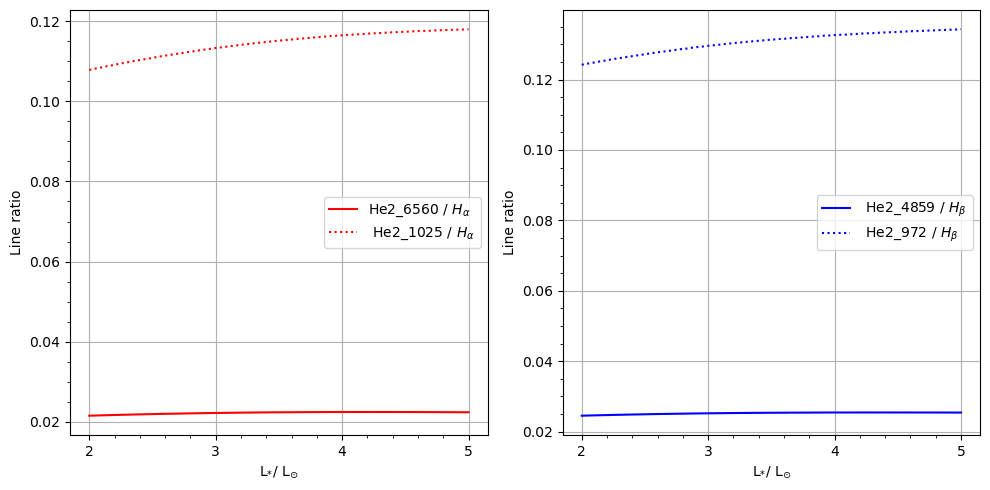

In [28]:
fig = plt.figure(1,figsize=(10,5))

plt.subplot(121)
plt.plot(Lumin-33, Lum_He2_6560 / Lum_Ha  ,'r',markersize=1,label=r'He2_6560 / $H_{\alpha}$')
plt.plot(Lumin-33, Lum_He2_1025 / Lum_Ha  ,'r:',markersize=1,label=r' He2_1025 / $H_{\alpha}$')
# plt.plot(Lumin_B/10**33,Lum_Ha_B / Lum_He2_6560_B,'k',markersize=1,label='Ha / He2_6560 , case B')
plt.legend()
# plt.yscale('log')
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Line ratio')
plt.xticks(np.linspace(2.0,5.0,4))
plt.grid(True)
# plt.yticks(np.linspace(0.02,0.03,5))
plt.minorticks_on()


plt.subplot(122)
plt.plot(Lumin-33, Lum_He2_4859 / Lum_Hb  ,'b',markersize=1,label=r' He2_4859 / $H_{\beta}$ ')
plt.plot(Lumin-33, Lum_He2_972 / Lum_Hb  ,'b:',markersize=1,label=r' He2_972 / $H_{\beta}$ ')
# plt.plot(Lumin_B/10**33,Lum_Ha_B / Lum_He2_6560_B,'k',markersize=1,label='Ha / He2_6560 , case B')
plt.legend()
# plt.yscale('log')
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Line ratio')
plt.xticks(np.linspace(2.0,5.0,4))
# plt.ylim(0.0,0.03)
# plt.yticks(np.linspace(30,50,5))
plt.minorticks_on()
plt.grid(True)
plt.tight_layout()



In [11]:
import pandas as pd
PNe = pd.read_csv(r'Young PNe.csv',header=0)
pn = PNe.iloc[:,[0,1,2,3,4]]
pn

,Name,Teff(K),L (Sun),4859/4861,6560/6563
0,NGC 6741,170000.00000,562.341325,0.01993,0.020107
1,H4-1,127452.00000,192.000000,0.00505,0.004954
2,Hu 2 -1,32500.00000,11500.000000,-1.00000,-1.000000
3,Hen2-447,107398.94120,592.925325,-1.00000,-1.000000
4,NGC 6886,152000.00000,680.000000,0.02090,0.022150
5,NGC 6881,98401.11058,369.200000,-1.00000,0.024247
6,NGC 6884,79799.46873,1874.994508,0.01160,0.009448
7,NGC 2392,80000.00000,26000.000000,-1.00000,-1.000000
8,J 900,129640.00000,5562.000000,-1.00000,0.020541
9,M 1 - 8,160694.12530,130.316678,-1.00000,-1.000000


In [12]:
h_4859__4861 = pn['4859/4861'].to_numpy()
h_6560_6563 = pn['6560/6563'].to_numpy()

tem, lum = pn['Teff(K)'].to_numpy() , pn['L (Sun)'].to_numpy()
lum =  np.log10(lum)
Name = pn['Name'].to_numpy()

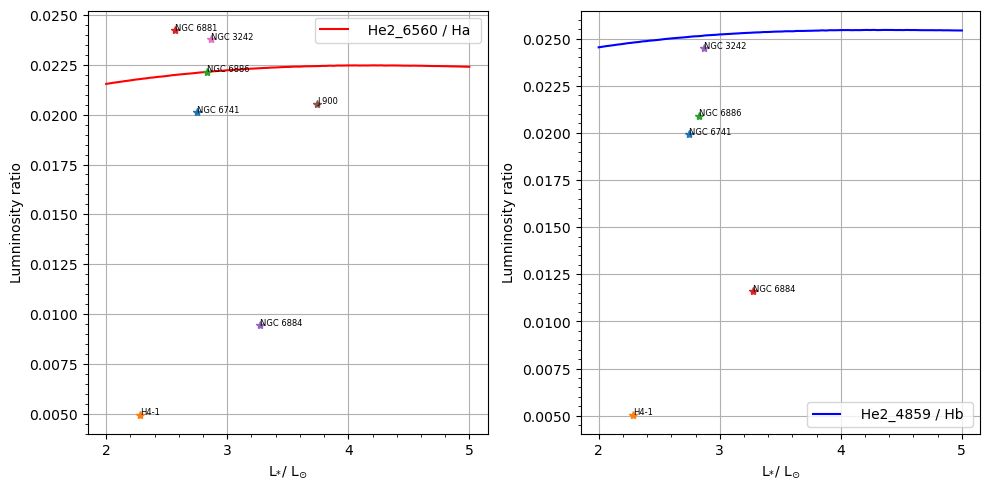

In [13]:
fig = plt.figure(1,figsize=(10,5))

plt.subplot(121)
plt.plot(Lumin-33, Lum_He2_6560 / Lum_Ha  ,'r',markersize=1,label='  He2_6560 / Ha ')


for ii ,label in enumerate(Name):
  if h_6560_6563[ii] >0 :
      plt.text(lum[ii],h_6560_6563[ii],label,fontsize=6)


for jj, ratio in enumerate(h_6560_6563):
  if ratio >0 :
   plt.plot(lum[jj],ratio,'*')
# plt.plot(Lumin-33, Lum_He2_1025 / Lum_Ha  ,'r:',markersize=1,label='  He2_1025 / Ha ')
# plt.plot(Lumin_B/10**33,Lum_Ha_B / Lum_He2_6560_B,'k',markersize=1,label='Ha / He2_6560 , case B')
plt.legend()
# plt.yscale('log')
# plt.ylim(0.0,0.05)
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')
plt.xticks(np.linspace(2.0,5.0,4))
plt.grid(True)
# plt.yticks(np.linspace(0.02,0.03,5))
plt.minorticks_on()


plt.subplot(122)
plt.plot(Lumin-33, Lum_He2_4859 / Lum_Hb  ,'b',markersize=1,label='  He2_4859 / Hb ')


for ii ,label in enumerate(Name):
  if h_4859__4861[ii] >0 :
    if label == 'NGC 3242' or label == 'NGC 6741':
      plt.text(lum[ii], h_4859__4861[ii],label,fontsize=6)
      plt.plot(lum[ii],h_4859__4861[ii],'*')
    else:
        plt.text(lum[ii], h_4859__4861[ii],label,fontsize=6)
        plt.plot(lum[ii],h_4859__4861[ii],'*')
    
# plt.ylim(0.024,0.026)

# plt.plot(Lumin-33, Lum_He2_972 / Lum_Hb  ,'b:',markersize=1,label='  He2_972 / Hb ')
# plt.plot(Lumin_B/10**33,Lum_Ha_B / Lum_He2_6560_B,'k',markersize=1,label='Ha / He2_6560 , case B')
plt.legend()
# plt.yscale('log')
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')
plt.xticks(np.linspace(2.0,5.0,4))
# plt.ylim(0.0,0.03)
# plt.yticks(np.linspace(30,50,5))
plt.minorticks_on()
plt.grid(True)
plt.tight_layout()



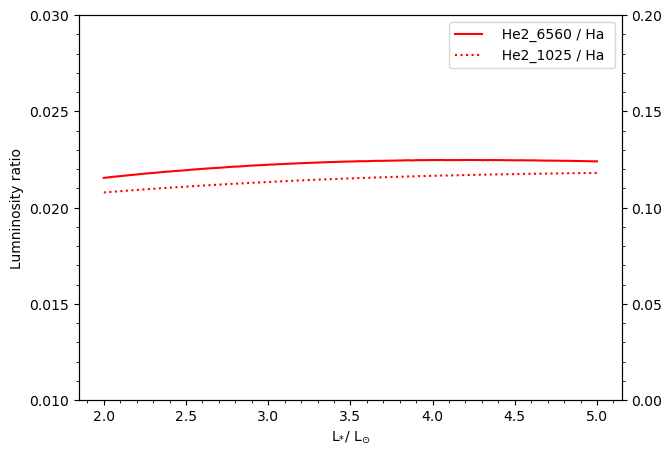

In [14]:


fig,ax1 = plt.subplots(1,figsize=(7,5))
line1 = ax1.plot(Lumin-33, Lum_He2_6560 / Lum_Ha  ,'r',markersize=1,label='  He2_6560 / Ha ')
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')
ax1.set_ylim(0.01,0.025)
ax1.minorticks_on()
# ax1.grid(True)
# ax1.set_xlim(Tem_l,Tem_h)
# plt.ylim(Lum_l,Lum_h)
# ax1.set_xticks(np.linspace(Tem_l,Tem_h,5))
ax1.set_yticks(np.linspace(0.01,0.03,5))

ax2 = ax1.twinx()
line2 = ax2.plot(Lumin-33, Lum_He2_1025 / Lum_Ha  ,'r:',markersize=1,label='  He2_1025 / Ha ')
# ax2.tick_params(axis='y',labelcolor='r')
ax2.set_ylim(0.1,0.15)
ax2.set_yticks(np.linspace(0.0,0.2,5))
# ax2.grid(True)

lines = line1+line2 
labels=[la.get_label() for la in lines]
plt.legend(lines,labels)

ax2.minorticks_on()
# plt.grid(True)


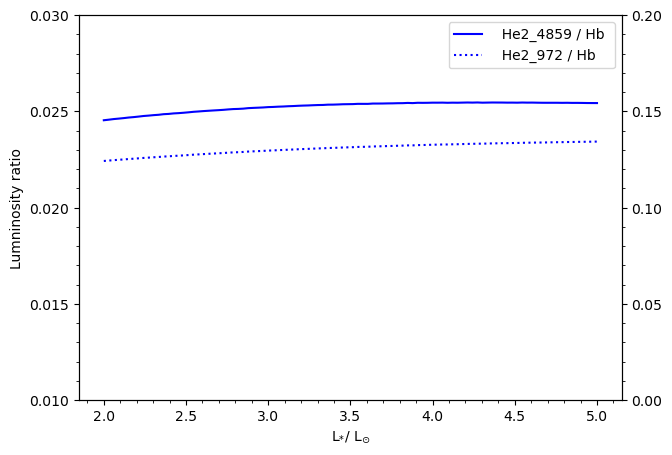

In [15]:

# plt.plot(Lumin-33, Lum_He2_4859 / Lum_Hb  ,'b',markersize=1,label='  He2_4859 / Hb ')
# plt.plot(Lumin-33, Lum_He2_972 / Lum_Hb  ,'b:',markersize=1,label='  He2_972 / Hb ')

fig,ax1 = plt.subplots(1,figsize=(7,5))
line1 = ax1.plot(Lumin-33, Lum_He2_4859 / Lum_Hb  ,'b',markersize=1,label='  He2_4859 / Hb ')
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')
ax1.set_ylim(0.01,0.025)
ax1.minorticks_on()
# ax1.grid(True)
# ax1.set_xlim(Tem_l,Tem_h)
# plt.ylim(Lum_l,Lum_h)
# ax1.set_xticks(np.linspace(Tem_l,Tem_h,5))
ax1.set_yticks(np.linspace(0.01,0.03,5))

ax2 = ax1.twinx()
line2 = ax2.plot(Lumin-33, Lum_He2_972 / Lum_Hb  ,'b:',markersize=1,label='  He2_972 / Hb ')
# ax2.tick_params(axis='y',labelcolor='r')
ax2.set_ylim(0.1,0.15)
ax2.set_yticks(np.linspace(0.0,0.2,5))
# ax2.grid(True)

lines = line1+line2 
labels=[la.get_label() for la in lines]
plt.legend(lines,labels)

ax2.minorticks_on()
# plt.grid(True)


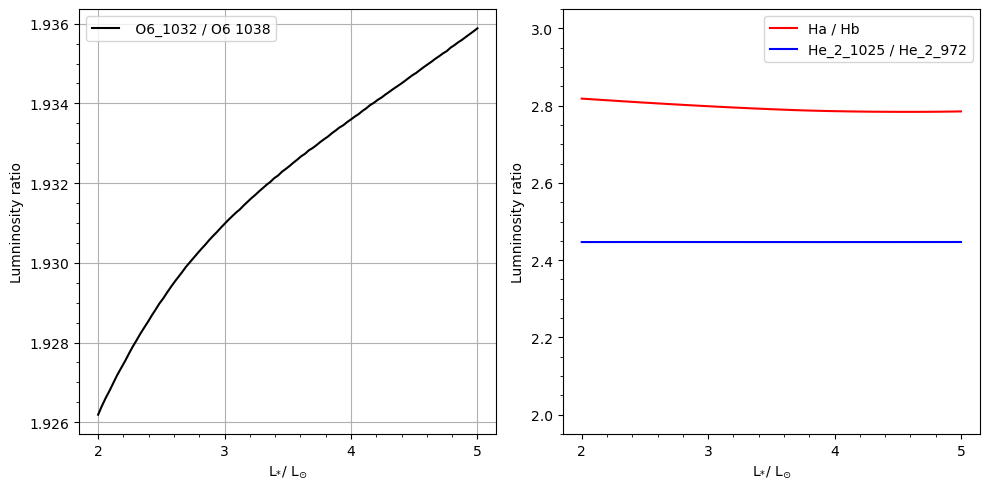

In [16]:
fig = plt.figure(1,figsize=(10,5))
plt.subplot(121)
plt.plot(Lumin-33,Lum_O6_1 / Lum_O6_2 ,'k',markersize=1,label=' O6_1032 / O6 1038')
# plt.plot(Lumin_B,Lum_O6_1_B / Lum_O6_2_B ,'k:',markersize=1,label=' O6_1032 / O6 1038 , case B')
plt.legend()
# plt.yscale('log')
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')
plt.xticks(np.linspace(2.,5.0,4))
plt.grid(True)
# plt.yticks(np.linspace(1.926,1.936,5))
plt.minorticks_on()

plt.subplot(122)

plt.plot(Lumin-33,Lum_Ha/Lum_Hb,'r',label='Ha / Hb ')
plt.plot(Lumin-33,Lum_He2_1025/Lum_He2_972,'b',label='He_2_1025 / He_2_972')
# plt.plot(Lumin_B,Lum_Ha_B/Lum_Hb_B,'r:',label='Ha / Hb , case B ')
# plt.plot(Lumin_B,Lum_He2_1025_B/Lum_He2_972_B,'b:',label='He_2_1025 / He_2_972 , case B')

plt.ylim(2.0,3.0)
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')
plt.xticks(np.linspace(2.0,5.0,4))
# plt.yticks(np.linspace(2.0,3.0,5))
plt.ylim(1.95,3.05)
plt.legend()

plt.minorticks_on()

plt.tight_layout()
# plt.savefig('Center star luminosity verus Luminosity_o6 and ha')

([<matplotlib.axis.YTick at 0x7fd264bda1d0>,
 [Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 5.5, '5.5'),
  Text(0, 6.0, '6.0')])

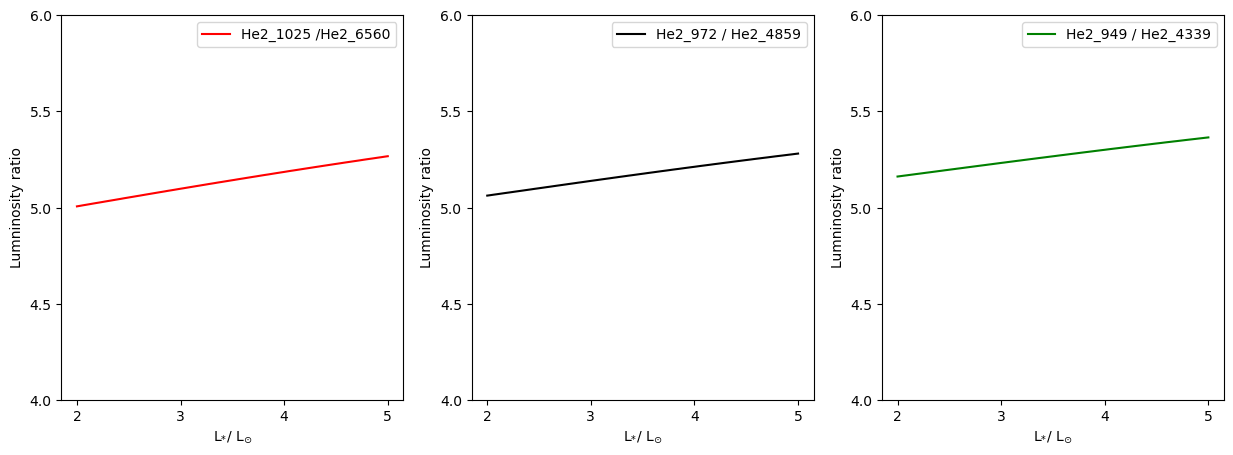

In [17]:
figure= plt.figure(1,figsize=(15,5))
plt.subplot(131)
plt.plot(Lumin-33,Lum_He2_1025 / Lum_He2_6560 , 'r',label='He2_1025 /He2_6560')
# plt.plot(Lumin_B,Lum_He2_1025_B / Lum_He2_6560_B , 'r:', label='He2_1025 /He2_6560, case B')
plt.legend()
plt.xticks(np.linspace(2.0,5.0,4))
plt.yticks(np.linspace(4.0,6.0,5))
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')

plt.subplot(132)
plt.plot(Lumin-33,Lum_He2_972 / Lum_He2_4859 , 'k', label='He2_972 / He2_4859')
# plt.plot(Lumin_B,Lum_He2_972_B / Lum_He2_4859_B , 'k:',label='He2_972 / Lum_He2_4859,case B')
plt.legend()
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')
plt.xticks(np.linspace(2.0,5.0,4))
plt.yticks(np.linspace(4.0,6.0,5))

plt.subplot(133)
plt.plot(Lumin-33,Lum_He2_949 / Lum_He2_4339 , 'g',label='He2_949 / He2_4339')
# plt.plot(Lumin_B,Lum_He2_949_B / Lum_He2_4339_B , 'g:',label='He2_949 / He2_4339,case B')
plt.legend()
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')
plt.xticks(np.linspace(2.0,5.0,4))
plt.yticks(np.linspace(4.0,6.0,5))
# plt.savefig('Center star luminosity verus Luminosity_he')

([<matplotlib.axis.YTick at 0x7fd2640a6410>,
 [Text(0, 4.0, '4.0'),
  Text(0, 4.5, '4.5'),
  Text(0, 5.0, '5.0'),
  Text(0, 5.5, '5.5'),
  Text(0, 6.0, '6.0')])

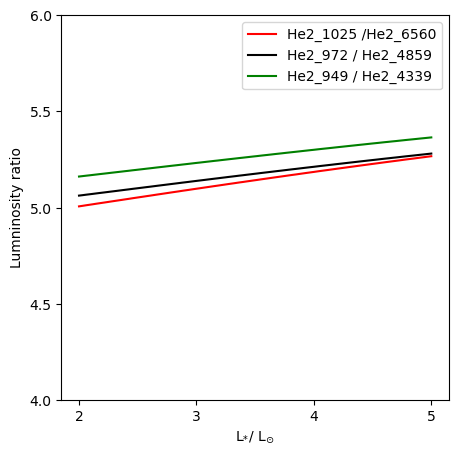

In [18]:
figure= plt.figure(1,figsize=(5,5))
plt.plot(Lumin-33,Lum_He2_1025 / Lum_He2_6560 , 'r',label='He2_1025 /He2_6560')
plt.plot(Lumin-33,Lum_He2_972 / Lum_He2_4859 , 'k', label='He2_972 / He2_4859')
plt.plot(Lumin-33,Lum_He2_949 / Lum_He2_4339 , 'g',label='He2_949 / He2_4339')
# plt.plot(Lumin_B,Lum_He2_949_B / Lum_He2_4339_B , 'g:',label='He2_949 / He2_4339,case B')
plt.legend()
plt.xlabel(r'L$_{*}$/ L$_{{\odot}}$')
plt.ylabel('Lumninosity ratio')
plt.xticks(np.linspace(2.0,5.0,4))
plt.yticks(np.linspace(4.0,6.,5))

Text(0, 0.5, 'Column Density')

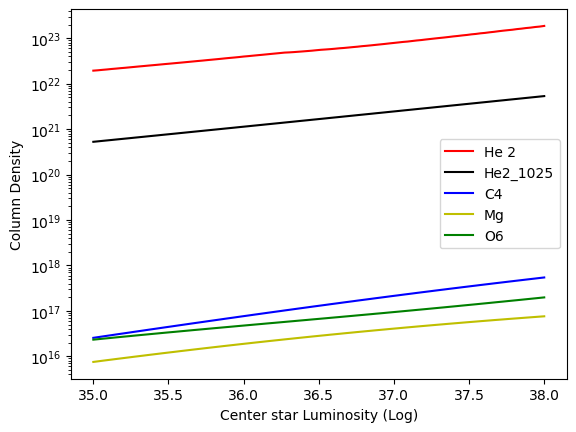

In [19]:
plt.plot(Lumin,Nden_HI,'r',markersize=1,label='He 2')
plt.plot(Lumin,Nden_HII,'k',markersize=1,label='He2_1025')
plt.plot(Lumin,Nden_OVI,'b',markersize=1,label='C4')
plt.plot(Lumin,Nden_NV,'y',markersize=1,label='Mg')
plt.plot(Lumin,Nden_CIV,'g',markersize=1,label='O6')

plt.legend()
plt.yscale('log')
plt.xlabel('Center star Luminosity (Log)')
plt.ylabel('Column Density')

Temperature results